In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

### 전국과 세종 그리고 서울 아파트 평당 가격 비교

In [2]:
data = pd.read_csv('./data/평균단위매매가격_아파트1.csv',encoding='cp949',header=10)

In [3]:
jeon=data[data['지 역']=='전국'].T
seoul=data[data['지 역']=='서울'].T
sejong=data[data['지 역']=='세종'].T

In [4]:
seoul_da=seoul.iloc[52:112]
sejong_da=sejong.iloc[52:112]
jeon_da=jeon.iloc[52:112]

#### 전국, 서울, 세종 평당 가격으로 변환

In [5]:
#평당 가격 구하기
seoul_da=seoul_da.astype(int)*3.3
jeon_da=jeon_da.astype(int)*3.3
sejong_da=sejong_da.astype(int)*3.3

In [6]:
sejo=[]
jeo=[]
seou=[]
for i in range(60):
    seou.append(int(seoul_da.values[i][0]))
    sejo.append(int(sejong_da.values[i][0]))
    jeo.append(int(jeon_da.values[i][0]))

In [7]:
new_index=[]
for i in range(60):
    if jeon_da.index[i][-3:]=='01월':
        new_index.append(jeon_da.index[i])
    else:
        new_index.append('')

#### 전국, 서울, 세종 평당 가격 비교 그래프

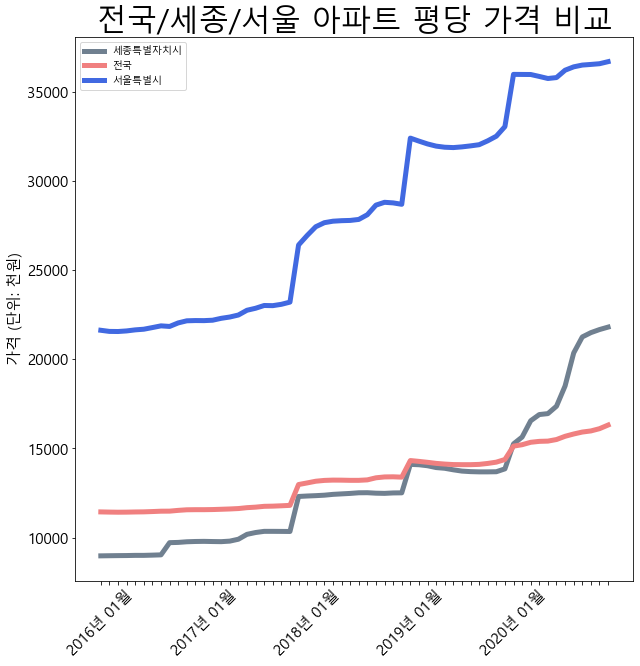

In [8]:
plt.figure(figsize=(10,10))
plt.plot(jeon_da.index,sejo,color='slategrey', linewidth=5, label='세종특별자치시') #세종
plt.plot(jeon_da.index,jeo,color='lightcoral',linewidth=5,label='전국') #전국
plt.plot(jeon_da.index,seou,color='royalblue',linewidth=5,label='서울특별시') #서울
plt.xticks(ticks=jeon_da.index, labels=new_index,rotation=45, fontsize=15)
plt.ylabel('가격 (단위: 천원)',fontsize=15)
plt.yticks(fontsize=15)
plt.title('전국/세종/서울 아파트 평당 가격 비교',fontsize=30)
plt.legend()
plt.show()